In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

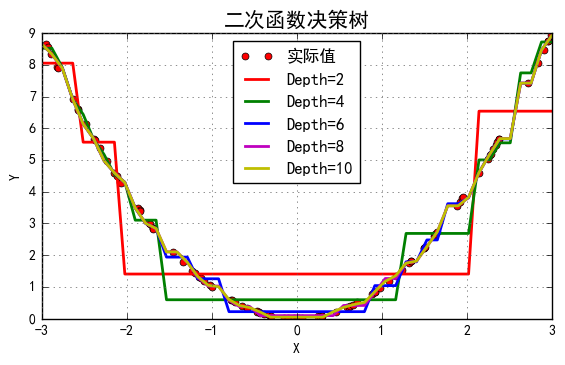

In [2]:
if __name__ == "__main__":

    # 准备训练数据
    N = 100
    x = np.random.rand(N) * 6 - 3
    x.sort()
    y = x*x
    x = x.reshape(-1, 1)

    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

    # 决策树深度及其曲线颜色
    depth = [2, 4, 6, 8, 10]
    clr = 'rgbmy'

    # 实际值
    plt.figure(facecolor='w')
    plt.plot(x, y, 'ro', ms=5, mec='k', label='实际值')

    # 准备测试数据
    x_test = np.linspace(-3, 3, 50).reshape(-1, 1)

    # 构建决策树
    dtr = DecisionTreeRegressor()
    # 循环不同深度情况下决策树的模型，并用之测试数据的输出
    for d, c in zip(depth, clr):
        # 设置最大深度（预剪枝）
        dtr.set_params(max_depth=d)
        # 训练决策树
        dtr.fit(x, y)
        # 用训练数据得到的模型来验证测试数据
        y_hat = dtr.predict(x_test)
        # 画出模型得到的曲线
        plt.plot(x_test, y_hat, '-', color=c, linewidth=2, markeredgecolor='k', label='Depth=%d' % d)
    # 一些画图的基本参数
    plt.legend(loc='upper center', fontsize=12)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(b=True, ls=':', color='#606060')
    plt.title('二次函数决策树', fontsize=15)
    plt.tight_layout(2)
    plt.show()